In [3]:
!pip install nltk


  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached regex-2024.11.6-cp311-cp311-macosx_10_9_x86_64.whl.metadata (40 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp311-cp311-macosx_10_9_x86_64.whl (287 kB)
Using cached click-8.2.1-py3-none-any.whl (102 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [nltk]3/4 [nltk]]


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/elifakdeniz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/8d/41krvnl108742n4xzr8g0zj80000gn/T/ipykernel_29581/3475483369.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=token_df, x='Frequency', y='Token', palette='mako')


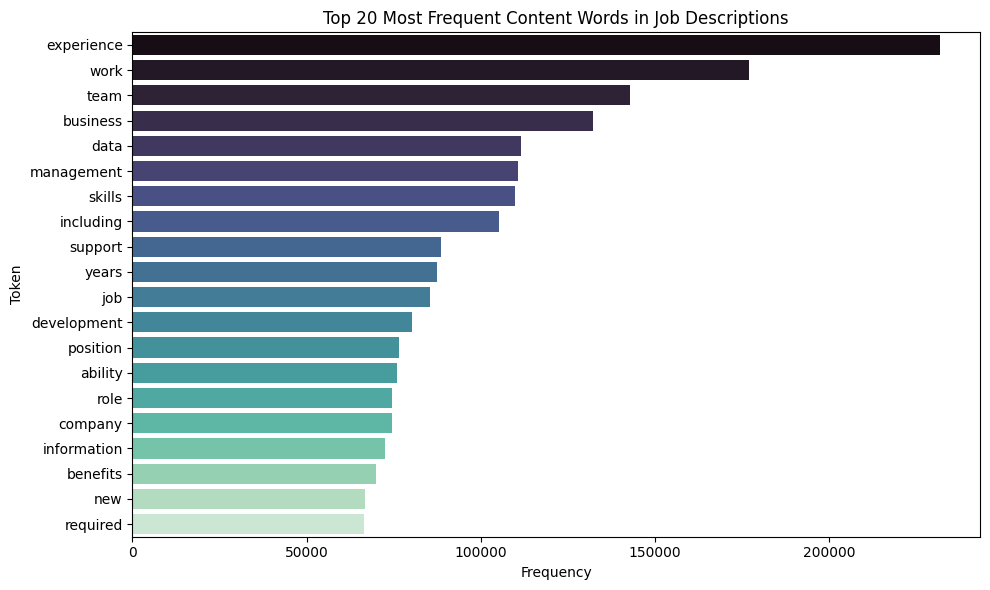

In [4]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already done
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load your dataset
df = pd.read_csv('/Users/elifakdeniz/Desktop/Thesis_New/Notebooks/Jupyter_notebook/Future Engineering/job_postings_with_features.csv')

# Convert desc_tokens from string to actual list
df['desc_tokens'] = df['desc_tokens'].apply(ast.literal_eval)

# Flatten and remove stopwords
all_tokens = [token.lower() for tokens in df['desc_tokens'] for token in tokens if token.lower() not in stop_words and token.isalpha()]

# Count and get top unigrams
token_counts = Counter(all_tokens)
top_tokens = token_counts.most_common(20)

# Turn into DataFrame
token_df = pd.DataFrame(top_tokens, columns=['Token', 'Frequency'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=token_df, x='Frequency', y='Token', palette='mako')
plt.title('Top 20 Most Frequent Content Words in Job Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Token')
plt.tight_layout()
plt.show()
